# Data Analysis Presentation
### Dataset
- Name: Restaurant Health Scores in greater SF area since 2016
- What: reports and descriptions of health code violations
- Key Data:
    - Inspection Score (out of 100)
    - Risk Category (Low, Moderate, or High)
    - Postal Code
    - Violation Description
- URL: https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i?row_index=0

## Imports and Setup

In [1]:
import pandas as pd
import warnings
import datetime
import folium
import json
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = None


def normalize(value, min, max):
    return (value - min) / (max - min)



## Load Data.

In [2]:
df = pd.read_csv('./Restaurant_Scores_-_LIVES_Standard.csv')
df.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score
count,53670.000000,28212.000000,28212.000000,1.736600e+04,39287.000000
mean,53867.667486,37.746055,-122.344368,1.415540e+10,86.173442
std,35937.248188,0.980196,3.176244,1.338598e+06,8.538046
min,19.000000,0.000000,-122.510896,1.415020e+10,45.000000
25%,6944.000000,37.755479,-122.436394,1.415537e+10,81.000000
50%,68390.000000,37.780047,-122.419320,1.415561e+10,87.000000
75%,85319.000000,37.789064,-122.407507,1.415580e+10,92.000000
max,101677.000000,37.824494,0.000000,1.415988e+10,100.000000


In [3]:
df.head(7)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,90604,Taqueria Los Amigos,5300 Mission St.,San Francisco,CA,94112,NaN,NaN,NaN,NaN,90604_20170502,05/02/2017 12:00:00 AM,NaN,New Ownership,90604_20170502_103133,Foods not protected from contamination,Moderate Risk
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,08/18/2017 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,04/12/2018 12:00:00 AM,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,96024_20181108,11/08/2018 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,97503_20180911,09/11/2018 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
6,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,NaN,NaN,NaN,1.415046e+10,97748_20180821,08/21/2018 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN


## Remove rows missing key data

In [4]:
df = df.dropna(subset=['risk_category', 'inspection_score', 'business_postal_code'])
df.head(7)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,04/12/2018 12:00:00 AM,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
7,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,NaN,NaN,NaN,NaN,77901_20180416,04/16/2018 12:00:00 AM,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk
8,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,NaN,NaN,NaN,1.415554e+10,87782_20180502,05/02/2018 12:00:00 AM,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk
16,74712,Kasa Indian Eatery,1356 Polk St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,74712_20180820,08/20/2018 12:00:00 AM,96.0,Routine - Unscheduled,74712_20180820_103129,Insufficient hot water or running water,Moderate Risk
20,77162,Ramen Yamadaya,1728 Buchanan St,San Francisco,CA,94115,NaN,NaN,NaN,NaN,77162_20181210,12/10/2018 12:00:00 AM,79.0,Routine - Unscheduled,77162_20181210_103103,High risk food holding temperature,High Risk
29,86002,MISS TOMATO SANDWICH SHOP,577 Geary St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,86002_20161122,11/22/2016 12:00:00 AM,82.0,Routine - Unscheduled,86002_20161122_103133,Foods not protected from contamination,Moderate Risk


## Drop unneeded columns

- Business_state and business_city are redundant. All SF,CA
- Many rows missing lat and long so drop those columns. 
    - NOTE: could have calcualted lat and long using business address with google streets API if we really wanted.
- Drop business address and business location (combo of lat and long)
- Drop business phone number
- Drop business name
    - NOTE: could potentially do some feature engineering here and try and extract cuisine type with best guess if we wanted. 

In [5]:
df = df.drop(['business_state','business_phone_number', 'business_latitude', 'business_longitude', 'business_location', 'business_address', 'business_city', 'business_name'], axis = 1)

# Clean postal codes

In [6]:
df['business_postal_code'].unique()

array(['94108', '94102', '94107', '94110', '94109', '94115', '94133',
       '94112', '94116', '94118', '94123', '94114', '94124', '94105',
       '94111', '94103', '94121', '94122', '94117', '94131', '94127',
       '94104', '94132', '94134', '94901', '94158', '94143', '94602',
       '94130', '94080', '94188', '64110', '94402', '94301', '95133',
       '00000', '94124-1917', '94123-3106', '95105', '941033148', '95132',
       '95112', 'Ca', '94101', '94014', '94120', '94013', '941',
       '941102019', 'CA', '92672', '95117'], dtype=object)

### Remove records with bad postal codes

In [7]:
df = df[df['business_postal_code'] != 'Ca'] # remove rows with postal code of 'Ca'
df = df[df['business_postal_code'] != 'CA'] # remove rows with postal code of 'CA'
df = df[df['business_postal_code'] != '00000'] # remove rows with postal code of 0000
df = df[df['business_postal_code'] != '00000'] # remove rows with postal code of 0000
df = df[df['business_postal_code'] != '941'] # remove row with too short a postal code

df['business_postal_code'].unique()

array(['94108', '94102', '94107', '94110', '94109', '94115', '94133',
       '94112', '94116', '94118', '94123', '94114', '94124', '94105',
       '94111', '94103', '94121', '94122', '94117', '94131', '94127',
       '94104', '94132', '94134', '94901', '94158', '94143', '94602',
       '94130', '94080', '94188', '64110', '94402', '94301', '95133',
       '94124-1917', '94123-3106', '95105', '941033148', '95132', '95112',
       '94101', '94014', '94120', '94013', '941102019', '92672', '95117'],
      dtype=object)

### Truncate postal codes with extra information (sub postal codes)

In [8]:
# remove extra values (those with dash and those without)
def remove_extra_postal_code_values_and_format_as_int(postal_code):
    if len(postal_code) == 6:
        return int(postal_code)
    else:
        if '-' in postal_code:
            return int(postal_code.split('-')[0])
        else:
            return int(postal_code[0:5])
        
df['business_postal_code'] = df['business_postal_code'].apply(lambda x: remove_extra_postal_code_values_and_format_as_int(x))
df['business_postal_code'].unique()

array([94108, 94102, 94107, 94110, 94109, 94115, 94133, 94112, 94116,
       94118, 94123, 94114, 94124, 94105, 94111, 94103, 94121, 94122,
       94117, 94131, 94127, 94104, 94132, 94134, 94901, 94158, 94143,
       94602, 94130, 94080, 94188, 64110, 94402, 94301, 95133, 95105,
       95132, 95112, 94101, 94014, 94120, 94013, 92672, 95117])

### change 64110 to 94110

In [9]:
df['business_postal_code'] = df['business_postal_code'].replace(64110, 94110) # 64110 is in Kansas so probably a typo
df['business_postal_code'].unique()

array([94108, 94102, 94107, 94110, 94109, 94115, 94133, 94112, 94116,
       94118, 94123, 94114, 94124, 94105, 94111, 94103, 94121, 94122,
       94117, 94131, 94127, 94104, 94132, 94134, 94901, 94158, 94143,
       94602, 94130, 94080, 94188, 94402, 94301, 95133, 95105, 95132,
       95112, 94101, 94014, 94120, 94013, 92672, 95117])

## Process Violation Descriptions

In [10]:
df['violation_description'].unique()

array(['Inadequate and inaccessible handwashing facilities',
       'Improper thawing methods', 'Improper food storage',
       'Low risk vermin infestation',
       'Insufficient hot water or running water',
       'High risk food holding temperature',
       'Foods not protected from contamination',
       'Wiping cloths not clean or properly stored or inadequate sanitizer',
       'Unapproved or unmaintained equipment or utensils',
       'Improper cooling methods',
       'Inadequately cleaned or sanitized food contact surfaces',
       'High risk vermin infestation', 'Moderate risk vermin infestation',
       'Unclean or degraded floors walls or ceilings',
       'Moderate risk food holding temperature',
       'No thermometers or uncalibrated thermometers',
       'Improper or defective plumbing',
       'Noncompliance with shell fish tags or display',
       'Inadequate warewashing facilities or equipment',
       'Unclean or unsanitary food contact surfaces',
       'Improper s

### Categorize Violation Descriptions

In [11]:
infrastructure_related = [
    'Inadequate and inaccessible handwashing facilities',
    'Improper storage use or identification of toxic substances',
    'Unapproved or unmaintained equipment or utensils',
    'Improper or defective plumbing',
    'Improper storage of equipment utensils or linens',
    'No hot water or running water',
    'Insufficient hot water or running water',
    'Inadequate sewage or wastewater disposal',
    'Inadequate ventilation or lighting',
    'Inadequate dressing rooms or improper storage of personal items',
    'No restroom facility within 200 feet of mobile food facility',
]

animal_related = [
    'Low risk vermin infestation',
    'High risk vermin infestation', 
    'Moderate risk vermin infestation',
    'Non service animal',
]

cleanliness_related = [
    'Wiping cloths not clean or properly stored or inadequate sanitizer',
    'Inadequately cleaned or sanitized food contact surfaces',
    'Unclean or degraded floors walls or ceilings',
    'Unclean or unsanitary food contact surfaces',
    'Unclean hands or improper use of gloves',
    'Unclean nonfood contact surfaces',
    'Unclean unmaintained or improperly constructed toilet facilities',
    'Unsanitary employee garments hair or nails',
    'Inadequate or unsanitary refuse containers or area or no garbage service',
    'Sewage or wastewater contamination',
    'Employee eating or smoking',
    'Discharge from employee nose mouth or eye',
    'Unreported or unrestricted ill employee with communicable disease'
]

compliance_and_documentation_related = [
    'Noncompliance with HAACP plan or variance',
    'Noncompliance with shell fish tags or display',
    'Inadequate warewashing facilities or equipment',
    'Unapproved  living quarters in food facility',
    'Inadequate food safety knowledge or lack of certified food safety manager',
    'Food safety certificate or food handler card not available',
    'Permit license or inspection report not posted',
    'Inadequate HACCP plan record keeping',
    'Improper food labeling or menu misrepresentation',
    'No plan review or Building Permit',
    'Inadequate procedures or records for time as a public health control',
    'Mobile food facility not operating with an approved commissary',
    'Improperly displayed mobile food permit or signage',
    'Unpermitted food facility',
    'Noncompliance with Gulf Coast oyster regulation',
    'Consumer advisory not provided for raw or undercooked foods',
    'Mobile food facility stored in unapproved location',
    'Mobile food facility with unapproved operating conditions',
    'Unauthorized or unsafe use of time as a public health control measure',
]

employee_related = [
    'No person in charge of food facility',
    'Worker safety hazards', 
]

food_related = [
    'Contaminated or adulterated food',        
    'Unapproved food source',
    'Improper cooking time or temperatures',
    'Food in poor condition',
    'Reservice of previously served foods',
    'Improper reheating of food', 
    'High risk food holding temperature',
    'Improperly washed fruits and vegetables',
    'Improper cooling methods',
    'Improper thawing methods', 
    'Improper food storage', 
    'No thermometers or uncalibrated thermometers',
    'Moderate risk food holding temperature',
    'Foods not protected from contamination',
]

other = [
    'Other low risk violation', 
    'Other high risk violation', 
    'Other moderate risk violation',
]

categories = {
    "infrastructure": infrastructure_related, 
    "animal": animal_related, 
    "cleanliness": cleanliness_related, 
    "compliance_and_documentation": compliance_and_documentation_related, 
    "employee": employee_related, 
    "food": food_related, 
    "other": other
}

### Add violation_category column, categorize violations, drop violation_description column

In [12]:
def categorize_violation_description(desc):
    for category_name in categories.keys():
        category_list = categories[category_name]
     
        for value in category_list:
            if value == desc:
                return category_name
df['violation_category'] = df['violation_description'].apply(lambda x: categorize_violation_description(x))
df = df.drop('violation_description', axis = 1)
df.head(7)

,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,risk_category,violation_category
1,69487,94108,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,Moderate Risk,infrastructure
3,85987,94102,85987_20180412,04/12/2018 12:00:00 AM,94.0,Routine - Unscheduled,85987_20180412_103132,Moderate Risk,food
7,77901,94107,77901_20180416,04/16/2018 12:00:00 AM,86.0,Routine - Unscheduled,77901_20180416_103139,Low Risk,food
8,87782,94110,87782_20180502,05/02/2018 12:00:00 AM,96.0,Routine - Unscheduled,87782_20180502_103161,Low Risk,animal
16,74712,94109,74712_20180820,08/20/2018 12:00:00 AM,96.0,Routine - Unscheduled,74712_20180820_103129,Moderate Risk,infrastructure
20,77162,94115,77162_20181210,12/10/2018 12:00:00 AM,79.0,Routine - Unscheduled,77162_20181210_103103,High Risk,food
29,86002,94102,86002_20161122,11/22/2016 12:00:00 AM,82.0,Routine - Unscheduled,86002_20161122_103133,Moderate Risk,food


### One-hot encode violation category

In [13]:
df = df.join(pd.get_dummies(df['violation_category']))
df = df.drop('violation_category', axis = 1)
df.head(7)


,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,risk_category,animal,cleanliness,compliance_and_documentation,employee,food,infrastructure,other
1,69487,94108,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,Moderate Risk,0,0,0,0,0,1,0
3,85987,94102,85987_20180412,04/12/2018 12:00:00 AM,94.0,Routine - Unscheduled,85987_20180412_103132,Moderate Risk,0,0,0,0,1,0,0
7,77901,94107,77901_20180416,04/16/2018 12:00:00 AM,86.0,Routine - Unscheduled,77901_20180416_103139,Low Risk,0,0,0,0,1,0,0
8,87782,94110,87782_20180502,05/02/2018 12:00:00 AM,96.0,Routine - Unscheduled,87782_20180502_103161,Low Risk,1,0,0,0,0,0,0
16,74712,94109,74712_20180820,08/20/2018 12:00:00 AM,96.0,Routine - Unscheduled,74712_20180820_103129,Moderate Risk,0,0,0,0,0,1,0
20,77162,94115,77162_20181210,12/10/2018 12:00:00 AM,79.0,Routine - Unscheduled,77162_20181210_103103,High Risk,0,0,0,0,1,0,0
29,86002,94102,86002_20161122,11/22/2016 12:00:00 AM,82.0,Routine - Unscheduled,86002_20161122_103133,Moderate Risk,0,0,0,0,1,0,0


## Process Risk Category (Ordinal Data)

In [14]:
df['risk_category'].unique()

array(['Moderate Risk', 'Low Risk', 'High Risk'], dtype=object)

### Convert to ordinal data (0,1,2) and then normalize

In [15]:
risk_category_ranking = ['Low Risk', 'Moderate Risk', 'High Risk']

turn_risk_into_ordinal = lambda x: risk_category_ranking.index(x)

df['risk_category'] = df['risk_category'].apply(turn_risk_into_ordinal)
df['risk_category'] = df['risk_category'].apply(lambda x: normalize(x, 0, 2))
df.head(7)


,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,risk_category,animal,cleanliness,compliance_and_documentation,employee,food,infrastructure,other
1,69487,94108,69487_20180418,04/18/2018 12:00:00 AM,88.0,Routine - Unscheduled,69487_20180418_103119,0.5,0,0,0,0,0,1,0
3,85987,94102,85987_20180412,04/12/2018 12:00:00 AM,94.0,Routine - Unscheduled,85987_20180412_103132,0.5,0,0,0,0,1,0,0
7,77901,94107,77901_20180416,04/16/2018 12:00:00 AM,86.0,Routine - Unscheduled,77901_20180416_103139,0.0,0,0,0,0,1,0,0
8,87782,94110,87782_20180502,05/02/2018 12:00:00 AM,96.0,Routine - Unscheduled,87782_20180502_103161,0.0,1,0,0,0,0,0,0
16,74712,94109,74712_20180820,08/20/2018 12:00:00 AM,96.0,Routine - Unscheduled,74712_20180820_103129,0.5,0,0,0,0,0,1,0
20,77162,94115,77162_20181210,12/10/2018 12:00:00 AM,79.0,Routine - Unscheduled,77162_20181210_103103,1.0,0,0,0,0,1,0,0
29,86002,94102,86002_20161122,11/22/2016 12:00:00 AM,82.0,Routine - Unscheduled,86002_20161122_103133,0.5,0,0,0,0,1,0,0


## Process Inspection Type

In [16]:
df['inspection_type'].unique()

array(['Routine - Unscheduled', 'New Ownership'], dtype=object)

### One-Hot encode two types of inspections and drop inspection_type column

In [17]:
df = df.join(pd.get_dummies(df['inspection_type']))
df = df.drop('inspection_type', axis = 1)
df.head(7)

,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,violation_id,risk_category,animal,cleanliness,compliance_and_documentation,employee,food,infrastructure,other,New Ownership,Routine - Unscheduled
1,69487,94108,69487_20180418,04/18/2018 12:00:00 AM,88.0,69487_20180418_103119,0.5,0,0,0,0,0,1,0,0,1
3,85987,94102,85987_20180412,04/12/2018 12:00:00 AM,94.0,85987_20180412_103132,0.5,0,0,0,0,1,0,0,0,1
7,77901,94107,77901_20180416,04/16/2018 12:00:00 AM,86.0,77901_20180416_103139,0.0,0,0,0,0,1,0,0,0,1
8,87782,94110,87782_20180502,05/02/2018 12:00:00 AM,96.0,87782_20180502_103161,0.0,1,0,0,0,0,0,0,0,1
16,74712,94109,74712_20180820,08/20/2018 12:00:00 AM,96.0,74712_20180820_103129,0.5,0,0,0,0,0,1,0,0,1
20,77162,94115,77162_20181210,12/10/2018 12:00:00 AM,79.0,77162_20181210_103103,1.0,0,0,0,0,1,0,0,0,1
29,86002,94102,86002_20161122,11/22/2016 12:00:00 AM,82.0,86002_20161122_103133,0.5,0,0,0,0,1,0,0,0,1


## Process Inspection Day of Week and Month

### Pull Day of week from 'inspeciton_date' column and add into own column

In [18]:
df['inspection_day_of_week'] = df['inspection_date'].apply(lambda x: datetime.datetime.strptime(x[:-12], '%m/%d/%Y').strftime('%A'))

### One-hot encode day of week

In [19]:
df = df.join(pd.get_dummies(df['inspection_day_of_week']))

### Do same for inspeciton month

In [20]:
df['inspection_month'] = df['inspection_date'].apply(lambda x: datetime.datetime.strptime(x[:-12], '%m/%d/%Y').strftime('%B'))
df = df.join(pd.get_dummies(df['inspection_month']))

In [21]:
df['inspection_year'] = df['inspection_date'].apply(lambda x: datetime.datetime.strptime(x[:-12], '%m/%d/%Y').strftime('%Y'))
df = df.join(pd.get_dummies(df['inspection_year']))

### Drop inspection month and inspeciton date columns

In [22]:
df = df.drop(['inspection_month', 'inspection_day_of_week'], axis = 1)
df.head(7)

,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,violation_id,risk_category,animal,cleanliness,compliance_and_documentation,employee,food,infrastructure,other,New Ownership,Routine - Unscheduled,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,inspection_year,2016,2017,2018,2019
1,69487,94108,69487_20180418,04/18/2018 12:00:00 AM,88.0,69487_20180418_103119,0.5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
3,85987,94102,85987_20180412,04/12/2018 12:00:00 AM,94.0,85987_20180412_103132,0.5,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
7,77901,94107,77901_20180416,04/16/2018 12:00:00 AM,86.0,77901_20180416_103139,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
8,87782,94110,87782_20180502,05/02/2018 12:00:00 AM,96.0,87782_20180502_103161,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2018,0,0,1,0
16,74712,94109,74712_20180820,08/20/2018 12:00:00 AM,96.0,74712_20180820_103129,0.5,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
20,77162,94115,77162_20181210,12/10/2018 12:00:00 AM,79.0,77162_20181210_103103,1.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
29,86002,94102,86002_20161122,11/22/2016 12:00:00 AM,82.0,86002_20161122_103133,0.5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,1,0,0,0


## Process Inspection Score

### Convert from strings to floats


In [23]:
df['inspection_score'] = df['inspection_score'].apply(lambda x: float(x))

### Normalize Inspeciton Score

In [24]:
max_inspection = df['inspection_score'].max()
min_inspection = df['inspection_score'].min()

df['inspection_score'] = df['inspection_score'].apply(lambda x: normalize(x, min_inspection, max_inspection))
df.head(7)

,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,violation_id,risk_category,animal,cleanliness,compliance_and_documentation,employee,food,infrastructure,other,New Ownership,Routine - Unscheduled,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,inspection_year,2016,2017,2018,2019
1,69487,94108,69487_20180418,04/18/2018 12:00:00 AM,0.781818,69487_20180418_103119,0.5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
3,85987,94102,85987_20180412,04/12/2018 12:00:00 AM,0.890909,85987_20180412_103132,0.5,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
7,77901,94107,77901_20180416,04/16/2018 12:00:00 AM,0.745455,77901_20180416_103139,0.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
8,87782,94110,87782_20180502,05/02/2018 12:00:00 AM,0.927273,87782_20180502_103161,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2018,0,0,1,0
16,74712,94109,74712_20180820,08/20/2018 12:00:00 AM,0.927273,74712_20180820_103129,0.5,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
20,77162,94115,77162_20181210,12/10/2018 12:00:00 AM,0.618182,77162_20181210_103103,1.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2018,0,0,1,0
29,86002,94102,86002_20161122,11/22/2016 12:00:00 AM,0.672727,86002_20161122_103133,0.5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,1,0,0,0


# Visualizations!

## Where do the most violations occur?

### Setup DataFrame for Choropleth

In [25]:
violations_per_postal_code = pd.DataFrame(df['business_postal_code'].value_counts())
violations_per_postal_code.to_json('out.json')
violations_per_postal_code = violations_per_postal_code.reset_index()
violations_per_postal_code.columns = ['postal_code', 'violations']
violations_per_postal_code.head(7)

,postal_code,violations
0,94110,4308
1,94103,3278
2,94109,2758
3,94133,2545
4,94102,2484
5,94118,1901
6,94112,1690


### # of Violations by postal code

In [26]:

SF_COORDINATES = (37.76, -122.45)
map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)
folium.Choropleth(
    geo_data = f'./Bay Area Zip Codes.geojson', 
    data_out = 'out.json',
    data = violations_per_postal_code,
    columns = ['postal_code', 'violations'],
    key_on = 'feature.properties.zip',
    fill_color = 'YlOrRd', 
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Number of Violations by Postal Code'

).add_to(map1)

display(map1)

## Where do the worst/best inspection scores occur?

In [27]:
# average_violation_score_by_postal_code = pd.DataFrame(df.groupby('business_postal_code').mean()['inspection_score'])
average_violation_score_by_postal_code = df.drop_duplicates(subset='inspection_id', keep='first').groupby('business_postal_code').mean()['inspection_score']
average_violation_score_by_postal_code = average_violation_score_by_postal_code.reset_index()
average_violation_score_by_postal_code.columns = ['business_postal_code', 'inspection_score']

SF_COORDINATES = (37.76, -122.45)
map2 = folium.Map(location=SF_COORDINATES, zoom_start=12)
folium.Choropleth(
    geo_data = f'./Bay Area Zip Codes.geojson', 
    data = average_violation_score_by_postal_code,
    columns = ['business_postal_code', 'inspection_score'],
    key_on = 'feature.properties.zip',
    fill_color = 'PRGn', 
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Aveage Inspection Score by Postal Code'
).add_to(map2)

display(map2)

# When do the violations occur?

## On what day of the week?

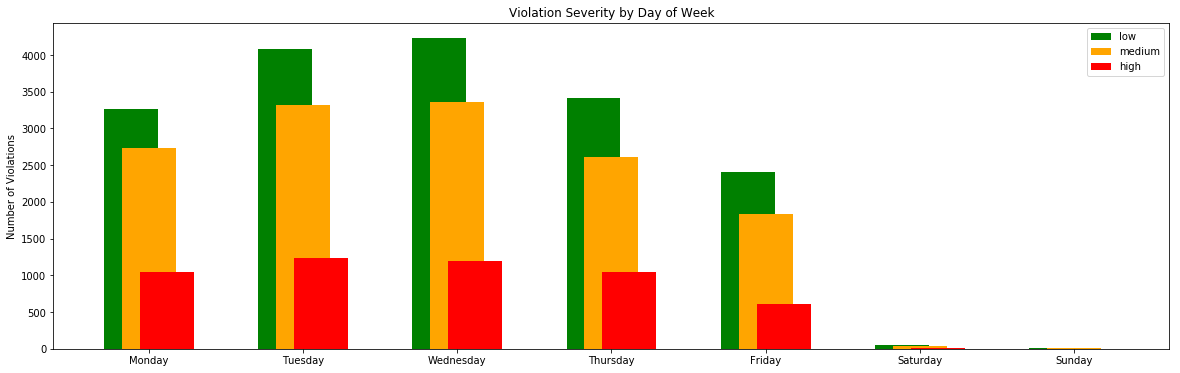

In [42]:
columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
low = df[df['risk_category'] == 0]

low_values = []
for column in columns:
    low_values.append(low[column].sum())
    
medium = df[df['risk_category'] == 0.5]

medium_values = []
for column in columns:
    medium_values.append(medium[column].sum())

high = df[df['risk_category'] == 1]

high_values = []
for column in columns:
    high_values.append(high[column].sum())

width = 0.35

x = np.arange(len(columns))
fig, ax = plt.subplots()


rects1 = ax.bar(x - width/3, low_values, width, label='low', color='green')
rects2 = ax.bar(x, medium_values, width, label='medium', color='orange')
rects3 = ax.bar(x + width/3, high_values, width, label='high', color='red')

ax.set_title('Violation Severity by Day of Week')
ax.legend()
ax.set_ylabel('Number of Violations')
plt.rcParams['figure.figsize'] = [20, 6]


plt.xticks(x, columns);

## On what month of they year?

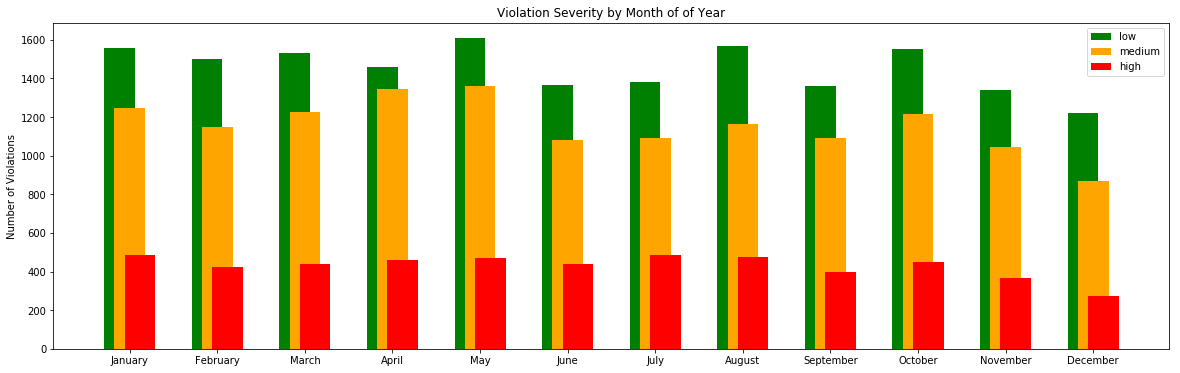

In [29]:
columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

low = df[df['risk_category'] == 0]

low_values = []
for column in columns:
    low_values.append(low[column].sum())
    
medium = df[df['risk_category'] == 0.5]

medium_values = []
for column in columns:
    medium_values.append(medium[column].sum())

high = df[df['risk_category'] == 1]

high_values = []
for column in columns:
    high_values.append(high[column].sum())

width = 0.35

x = np.arange(len(columns))
fig, ax = plt.subplots()


rects1 = ax.bar(x - width/3, low_values, width, label='low', color='green')
rects2 = ax.bar(x, medium_values, width, label='medium', color='orange')
rects3 = ax.bar(x + width/3, high_values, width, label='high', color='red')

ax.set_title('Violation Severity by Month of of Year')
ax.legend()
ax.set_ylabel('Number of Violations')

plt.xticks(x, columns);

## What types of violations occur?

### New ownership or Unscheduled violations?

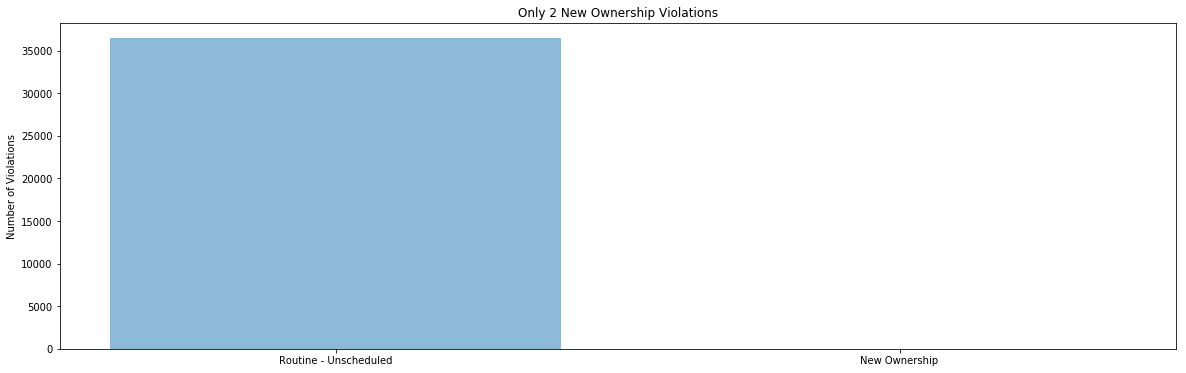

In [30]:

columns = ['Routine - Unscheduled', 'New Ownership']
values = []
y_pos = np.arange(len(columns))

for column in columns:
    values.append(df[column].sum())
    
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(y_pos, values, align = 'center', alpha = 0.5)
plt.xticks(y_pos, columns)
ax.set_ylabel('Number of Violations')


ax.set_title("Only 2 New Ownership Violations");

### What category of violations occur most frequently?

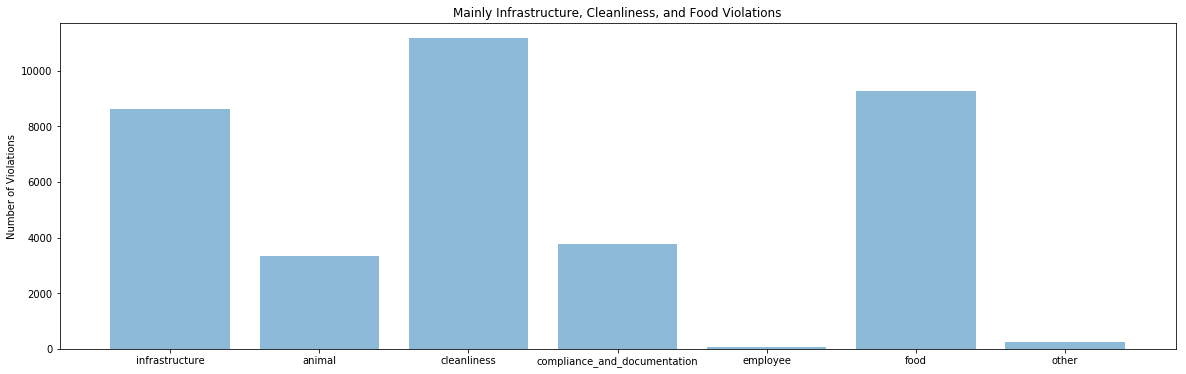

In [31]:
columns = categories
values = []
y_pos = np.arange(len(columns))

for column in columns:
    values.append(df[column].sum())
fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [20, 6]
plt.bar(y_pos, values, align = 'center', alpha = 0.5)
plt.xticks(y_pos, columns)
ax.set_title("Mainly Infrastructure, Cleanliness, and Food Violations")
ax.set_ylabel('Number of Violations')


plt.show()

### For each category, what proportion are low, moderate, and high risk violations?

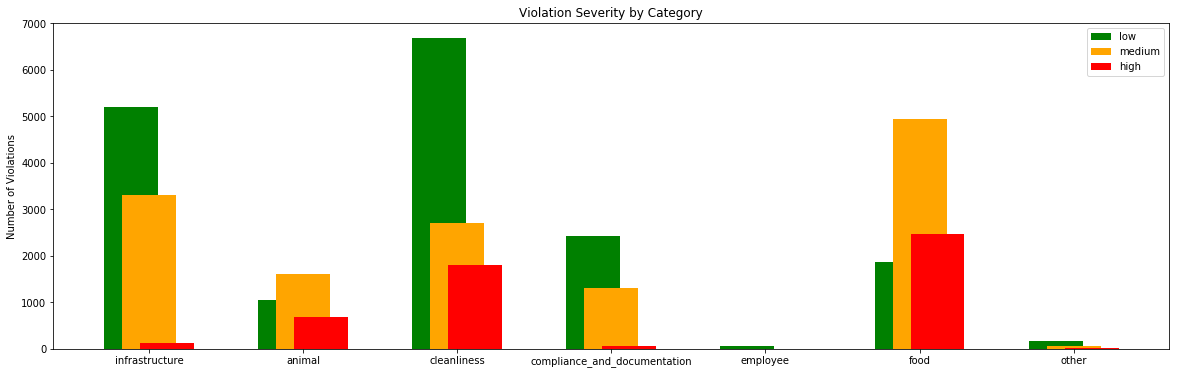

In [32]:
low = df[df['risk_category'] == 0]

low_values = []
for category in categories:
    low_values.append(low[category].sum())
    
medium = df[df['risk_category'] == 0.5]

medium_values = []
for category in categories:
    medium_values.append(medium[category].sum())

high = df[df['risk_category'] == 1]

high_values = []
for category in categories:
    high_values.append(high[category].sum())

width = 0.35

x = np.arange(len(categories))
fig, ax = plt.subplots()


rects1 = ax.bar(x - width/3, low_values, width, label='low', color='green')
rects2 = ax.bar(x, medium_values, width, label='medium', color='orange')
rects3 = ax.bar(x + width/3, high_values, width, label='high', color='red')

ax.set_title('Violation Severity by Category')
ax.legend()
ax.set_ylabel('Number of Violations')

plt.xticks(y_pos, columns);

In [33]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])
df = df.sort_values(by='inspection_date')
df.head(7)

,business_id,business_postal_code,inspection_id,inspection_date,inspection_score,violation_id,risk_category,animal,cleanliness,compliance_and_documentation,employee,food,infrastructure,other,New Ownership,Routine - Unscheduled,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,inspection_year,2016,2017,2018,2019
24951,78306,94134,78306_20160719,2016-07-19,0.727273,78306_20160719_103119,0.5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0
43764,3091,94103,3091_20160719,2016-07-19,0.836364,3091_20160719_103103,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0
53475,59044,94110,59044_20160719,2016-07-19,0.509091,59044_20160719_103154,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0
45612,61427,94103,61427_20160719,2016-07-19,0.509091,61427_20160719_103150,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0
18388,78306,94134,78306_20160719,2016-07-19,0.727273,78306_20160719_103124,0.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0
37231,7105,94117,7105_20160719,2016-07-19,0.890909,7105_20160719_103149,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0
20395,86172,94132,86172_20160719,2016-07-19,0.854545,86172_20160719_103149,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2016,1,0,0,0


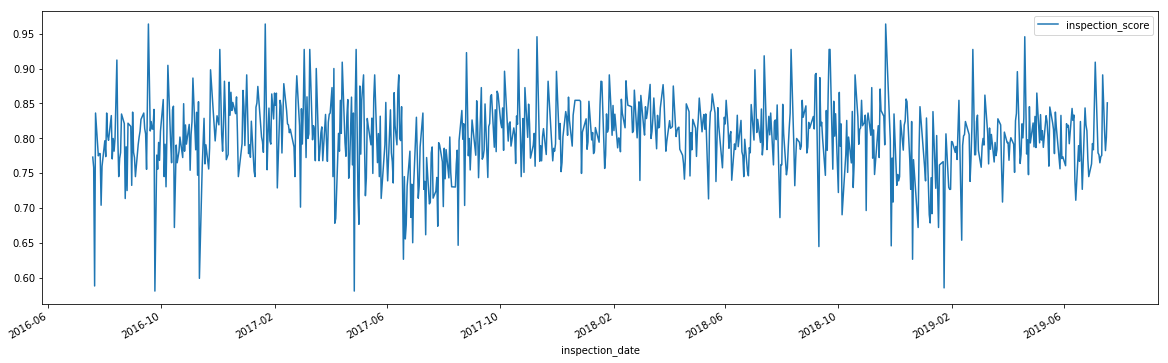

In [34]:
mean_inspection_score_over_time = pd.DataFrame(df.drop_duplicates(subset='inspection_id', keep='first').groupby('inspection_date').mean()['inspection_score'])
mean_inspection_score_over_time.plot();

## Changes in Each Postal Code Inspection Scores over Time

### Get inspection score means for each postal code in 2016, 2017, 2017

In [35]:
df_2016 = df[df['2016'] == 1]
by_postal_code_2016 = df_2016.drop_duplicates(subset='inspection_id', keep='first').groupby('business_postal_code').mean()['inspection_score']
by_postal_code_2016.name = '2016_score'

df_2017 = df[df['2017'] == 1]
by_postal_code_2017 = df_2017.drop_duplicates(subset='inspection_id', keep='first').groupby('business_postal_code').mean()['inspection_score']
by_postal_code_2017.name = '2017_score'


df_2018 = df[df['2018'] == 1]
by_postal_code_2018 = df_2018.drop_duplicates(subset='inspection_id', keep='first').groupby('business_postal_code').mean()['inspection_score']
by_postal_code_2018.name = '2018_score'


### Create dataframe with each postal codes yearly mean

In [36]:
over_time_df = pd.concat([by_postal_code_2016, by_postal_code_2017, by_postal_code_2018], axis = 1)
over_time_df.head(7)

,2016_score,2017_score,2018_score
business_postal_code,,,
92672,NaN,0.763636,NaN
94013,0.927273,NaN,NaN
94014,0.963636,NaN,NaN
94080,NaN,0.854545,0.872727
94101,0.581818,0.763636,0.854545
94102,0.774839,0.799643,0.828283
94103,0.806621,0.794714,0.805772


### Drop rows missing any yearly score

In [37]:
over_time_df = over_time_df.dropna()
over_time_df.head(7)

,2016_score,2017_score,2018_score
business_postal_code,,,
94101,0.581818,0.763636,0.854545
94102,0.774839,0.799643,0.828283
94103,0.806621,0.794714,0.805772
94104,0.812273,0.792103,0.830736
94105,0.820553,0.779104,0.816240
94107,0.825277,0.827477,0.834789
94108,0.772100,0.806105,0.783456


### Plot Postal code inspeciton scores over time

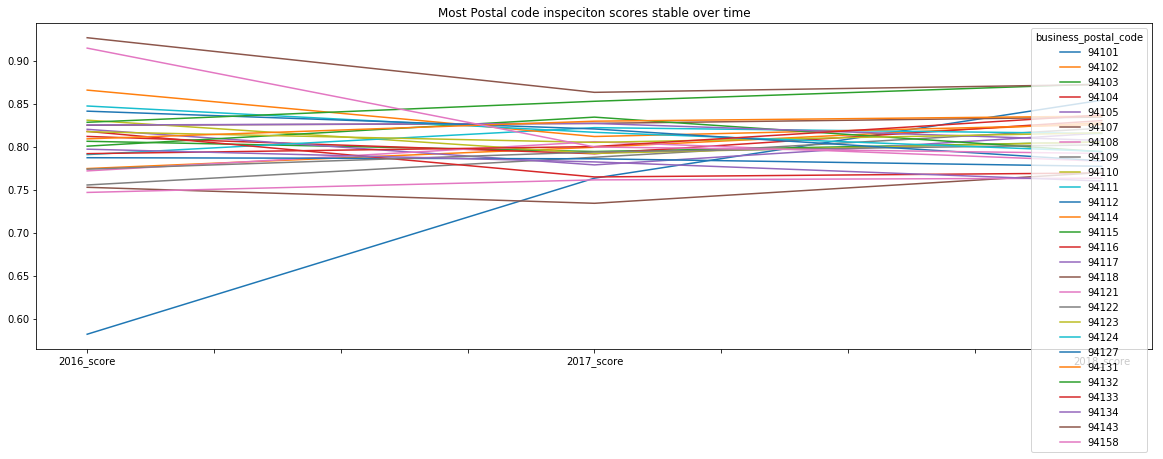

In [38]:
over_time_df.T.plot(title = 'Most Postal code inspeciton scores stable over time')

## Find 5 biggest winnesr and 5 biggest losers

### Calculate percent change from 2016 to 2018

In [39]:
over_time_df['pct_change_2016_to_2018'] = (over_time_df['2018_score'] - over_time_df['2016_score']) / over_time_df['2016_score'] * 100
over_time_df.head(7)

,2016_score,2017_score,2018_score,pct_change_2016_to_2018
business_postal_code,,,,
94101,0.581818,0.763636,0.854545,46.875000
94102,0.774839,0.799643,0.828283,6.897369
94103,0.806621,0.794714,0.805772,-0.105198
94104,0.812273,0.792103,0.830736,2.273030
94105,0.820553,0.779104,0.816240,-0.525656
94107,0.825277,0.827477,0.834789,1.152618
94108,0.772100,0.806105,0.783456,1.470777


### Biggest Losers

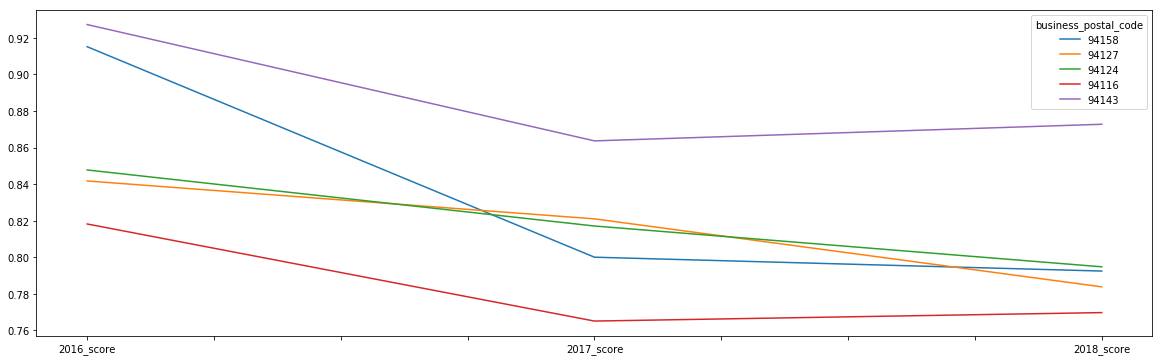

In [40]:
biggest_losers = over_time_df.sort_values(by='pct_change_2016_to_2018')[:5]
biggest_losers = biggest_losers.drop('pct_change_2016_to_2018', axis =1)
biggest_losers.T.plot();


### Biggest Winners

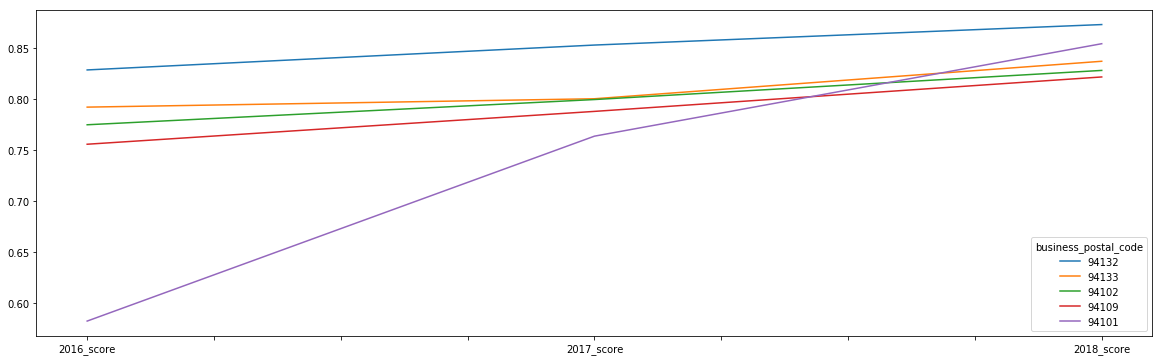

In [41]:
biggest_winners = over_time_df.sort_values(by='pct_change_2016_to_2018')[-5:]
biggest_winners = biggest_winners.drop('pct_change_2016_to_2018', axis =1)
biggest_winners.T.plot()

## Final Considerations About Data

### Normalize Postal codes?

Doesnt really make sense to normalize postal codes and use them as a feature since postalcodes work in a grid pattern. A better approach is to use the business address to find the the lat and long and use those two as normalized features

# Summary

## Where violations Occur
- Some areas have much higher rates of violations than others
- Severity of violation isnt necessarily related to amount of violations (by area)
- Out of SF downtown there is drastic change in score (maybe different health inspector or standards?)

## Why violations occur
- Food, Cleanliness, and Infrastructure violations are the most frequent violation types. Cleanliness is most frequent.
- Food and Animal type violations have different risk category distribution than the other categories (more moderate risk violations than other two types)
- Significantly smaller proproption of  high risk infrastructure or compliance/documentation violations

## When violations occur
- Most violations occur on weekdays. There doesnt seem to be a difference in proporiton of risk violations depending on day of week.
- Friday has lowest number of weekday violations (lazy health inspectors?)
- Proportion of low, moderate, high risk violations same for all months
- December has lowest number of violations (health inspectors on vacation?)

## How violations Occur
- Almost all violations are unscheduled. With only a small handful being "New Ownership" type violations

## Trends
- Apparent sinusoidal trend of inspection scores. 
- Most postal codes have steady inspection scores from 2016 to 2018
- There a few big movers that either significantly increased or decreased.

